#### __***SHAP on Machine Learning Models***__

#### __***Tabular Data***__

In [1]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('data/diabetes_data_raw.csv')
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
X = df.drop(columns=['diabetes'])
y = df['diabetes']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [5]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

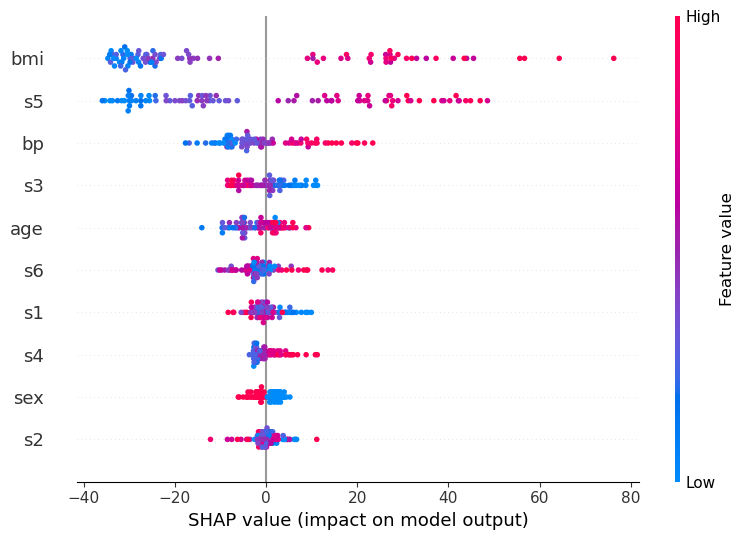

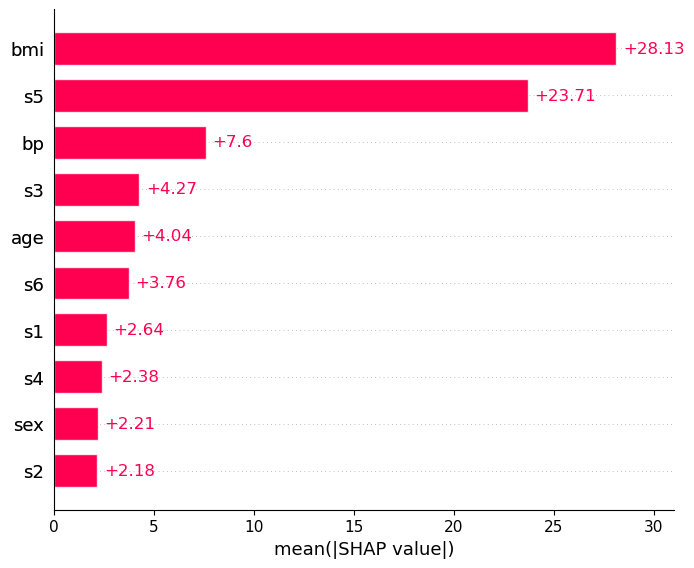

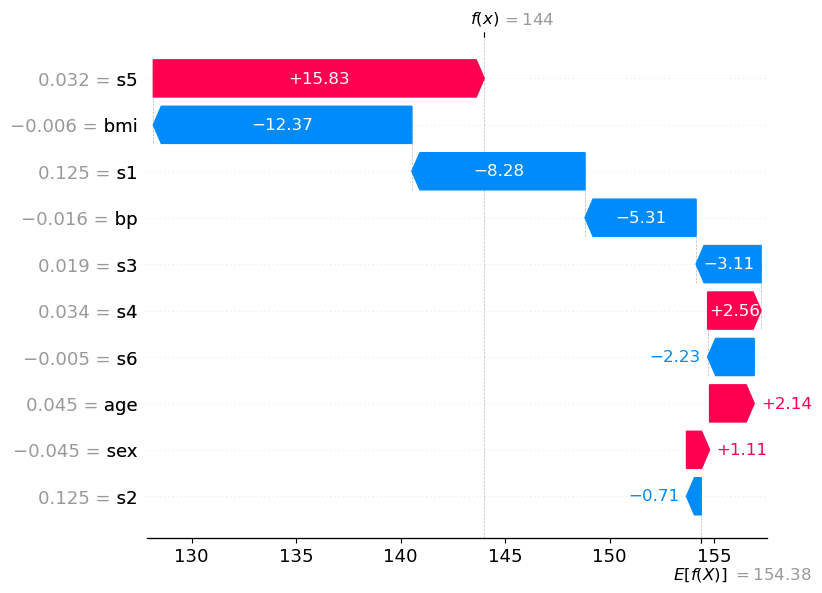

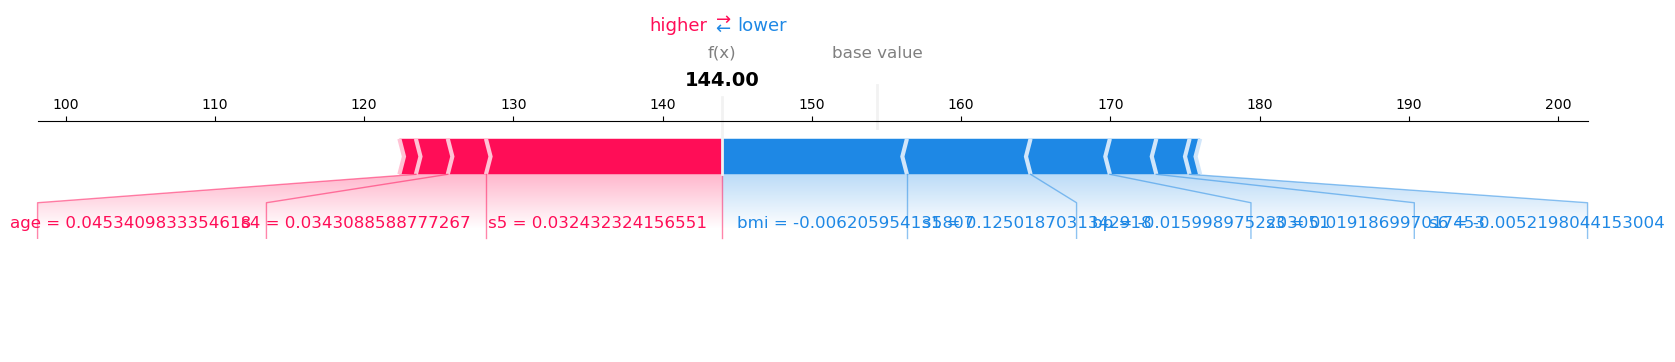

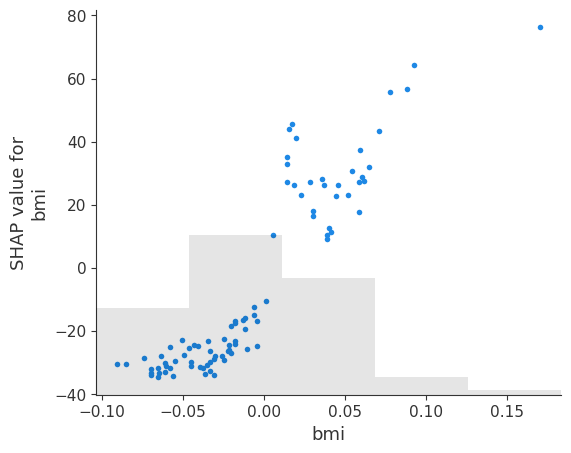

In [6]:
shap.summary_plot(shap_values, X_test, show=False)
plt.show()

shap.plots.bar(shap_values, show=False)
plt.show()

shap.plots.waterfall(shap_values[0], show=False)
plt.show()

shap.plots.force(explainer.expected_value, shap_values[0].values, X_test.iloc[0], matplotlib=True, show=False)
plt.show()

idx = np.abs(shap_values.values).mean(0).argmax()
shap.plots.scatter(shap_values[:, idx], show=False)
plt.show()